TUGAS BESAR AI : ALGORITMA GENETIK
(1301204125) Ryan Chandra Hadi
(1301200240) Ramadhan Aditya Ibrahim

In [20]:
import numpy as np
import pandas as pd
import math

In [21]:
# minimum dan maksimum value yang ada di dalam fungsi
min = -5
max = 5

# menyatakan banyaknya variabel, panjang dari kromosom itu sendiri (x,y)
m = 2

# menyatakan banyaknya populasi 
n = 100

# pc = 1
# pm = interval -0.1 s.d 0.1

# maksimum generasi
N = 20

In [22]:
def createPopulations(): # fungsi ini dibuat untuk meng-generate populasi
    populasi = np.random.rand(n, m)*(max - min)+ min
    pop = pd.DataFrame(populasi)
    pop.columns = ['x', 'y']
    
    return pop

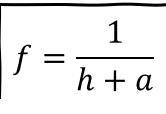

In [23]:
def fitness(pop): 
    h = (np.cos(pop['x']) + np.sin(pop['y']))**2 / ((pop['x'])**2 + (pop['y'])**2) # rumus untuk mencari nilai h(x, y)
    fitness = 1 / h + 1
    pop['Fitness'] = fitness
    pop['Nilai Fungsi'] = h
    
    return pop

In [24]:
def randomSelection(): # fungsi untuk meng-generate indeks random 
    position = np.random.permutation(n)
    
    return position[0], position[1]

In [25]:
def crossover(pop): # fungsi ini untuk melakukan pindah silang yang sudah 
                    # dilakukan seleksi orang tua dengan menggunakan metode fungsi randomSelection
    popCrossover = pop.copy()
    for i in range(n):
        a, b = randomSelection()
        x = (pop.loc[a] + pop.loc[b])/2
        popCrossover.loc[i] = x
        
    return popCrossover

In [26]:
def mutasi(popCrossover): # fungsi ini kita pakai untuk membuat mutasi pada populasi 
                          # yang telah kita lakukan crossover
    popMutasi = popCrossover.copy()

    for i in range(n):
        for j in popMutasi.columns:
            popMutasi.loc[i][j] += np.random.uniform(low=-0.1, high=0.1)

    return popMutasi


In [27]:
def combinePop(pop, popCrossover, popMutasi): # Menggabungkan nilai populasi awal,
                                              # setelah crossover dan setelah mutasi
    popAll = pop.copy()
    popAll = popAll.append(popCrossover)
    popAll = popAll.append(popMutasi)

    popAll.index = range(len(popAll))
    
    return popAll

In [28]:
def sort(popAll): # mengurutkan nilai values berdasarkan fitness secara descending
    popAll = popAll.sort_values(by=['Fitness'], ascending = False)
    popAll.index = range(len(popAll))

    return popAll

In [29]:
def eliminasi(popAll):  # setelah kita lakukan sort, kita lakukan eliminasi sebanyak n = 100
    pop = popAll.head(n)
    
    return pop

In [30]:
pop = createPopulations()
pop

,x,y
0,-4.775237,-0.301388
1,-2.487968,-0.389198
2,1.852350,-2.021725
3,-2.392839,-1.880617
4,-0.230443,-3.330279
...,...,...
95,0.165339,2.615354
96,-0.463696,-0.154004
97,-1.645977,-0.698770
98,-1.201781,3.453103


In [31]:
pop = fitness(pop)
pop

,x,y,Fitness,Nilai Fungsi
0,-4.775237,-0.301388,418.964429,0.002393
1,-2.487968,-0.389198,5.606253,0.217096
2,1.852350,-2.021725,6.419072,0.184533
3,-2.392839,-1.880617,4.262584,0.306505
4,-0.230443,-3.330279,9.265534,0.120984
...,...,...,...,...
95,0.165339,2.615354,4.098916,0.322693
96,-0.463696,-0.154004,1.434772,2.300057
97,-1.645977,-0.698770,7.195797,0.161400
98,-1.201781,3.453103,4551.561394,0.000220


In [32]:
popCrossover = crossover(pop)
print(popCrossover)

           x         y        Fitness  Nilai Fungsi
0  -2.252258  0.629726       9.433835      0.210027
1  -0.013822 -1.770872      10.027830      0.177380
2  -0.075666  1.008051      52.651486      0.148050
3  -0.486969 -1.574159       5.056598      0.277856
4  -3.918028  0.696141  334361.982085      0.001197
..       ...       ...            ...           ...
95  1.532305 -0.295216       2.711577      4.761698
96  2.917693 -0.554337    1018.975564      0.031911
97  1.289058  0.277263    1410.657440      0.015213
98 -1.900769  1.615544      45.853223      4.616436
99  1.611126  0.344210       4.295586      0.304521

[100 rows x 4 columns]


In [33]:
popCrossover = fitness(popCrossover)
popCrossover

,x,y,Fitness,Nilai Fungsi
0,-2.252258,0.629726,3253.580612,0.000307
1,-0.013822,-1.770872,7958.059609,0.000126
2,-0.075666,1.008051,1.300875,3.323637
3,-0.486969,-1.574159,201.947995,0.004976
4,-3.918028,0.696141,3042.637464,0.000329
...,...,...,...,...
95,1.532305,-0.295216,39.204887,0.026175
96,2.917693,-0.554337,4.912695,0.255578
97,1.289058,0.277263,6.710873,0.175105
98,-1.900769,1.615544,14.658674,0.073214


In [34]:
popMutasi = mutasi(popCrossover)

popMutasi

,x,y,Fitness,Nilai Fungsi
0,-2.177107,0.644991,3253.525133,0.006500
1,-0.106606,-1.700822,7958.099759,-0.010430
2,-0.159545,1.067721,1.234536,3.371348
3,-0.494062,-1.601706,202.039611,0.036870
4,-3.959732,0.706694,3042.547742,-0.002221
...,...,...,...,...
95,1.617941,-0.312845,39.289969,0.093195
96,2.944365,-0.596510,4.905990,0.195307
97,1.310742,0.251821,6.795522,0.078226
98,-1.885862,1.609117,14.592242,0.067049


In [35]:
popMutasi = fitness(popMutasi)

popMutasi

,x,y,Fitness,Nilai Fungsi
0,-2.177107,0.644991,5246.490153,0.000191
1,-0.106606,-1.700822,380043.132730,0.000003
2,-0.159545,1.067721,1.335654,2.979256
3,-0.494062,-1.601706,199.039663,0.005049
4,-3.959732,0.706694,13787.537549,0.000073
...,...,...,...,...
95,1.617941,-0.312845,22.561028,0.046380
96,2.944365,-0.596510,4.793797,0.263588
97,1.310742,0.251821,7.949576,0.143894
98,-1.885862,1.609117,13.931442,0.077331


In [36]:
popAll = combinePop(pop, popCrossover, popMutasi)
popAll

,x,y,Fitness,Nilai Fungsi
0,-4.775237,-0.301388,418.964429,0.002393
1,-2.487968,-0.389198,5.606253,0.217096
2,1.852350,-2.021725,6.419072,0.184533
3,-2.392839,-1.880617,4.262584,0.306505
4,-0.230443,-3.330279,9.265534,0.120984
...,...,...,...,...
295,1.617941,-0.312845,22.561028,0.046380
296,2.944365,-0.596510,4.793797,0.263588
297,1.310742,0.251821,7.949576,0.143894
298,-1.885862,1.609117,13.931442,0.077331


In [37]:
popAll = sort(popAll)
popAll

,x,y,Fitness,Nilai Fungsi
0,3.051415,-4.770272,5.620881e+06,1.779081e-07
1,0.141526,-1.705274,3.113899e+06,3.211408e-07
2,-2.580889,-4.143216,1.158808e+06,8.629561e-07
3,0.185413,-1.766776,7.866897e+05,1.271151e-06
4,3.239590,1.607379,7.671896e+05,1.303460e-06
...,...,...,...,...
295,-0.209028,-0.229000,1.170346e+00,5.870407e+00
296,0.329183,0.090731,1.108440e+00,9.221711e+00
297,-0.186637,-0.173770,1.099180e+00,1.008268e+01
298,0.091095,0.136488,1.021017e+00,4.758149e+01


In [38]:
pop = createPopulations()
pop = fitness(pop)
print("Generasi Pertama")
print(pop)

for i in range(N):
    popCrossover = crossover(pop)
    popCrossover = fitness(popCrossover)
    
    popMutasi = mutasi(popCrossover)
    popMutasi = fitness(popMutasi)
    
    popAll = combinePop(pop, popCrossover, popMutasi)
    
    popAll = sort(popAll)
    pop = eliminasi(popAll)
    print()
    print(i)
    print(pop)

print()
print("Generasi Terakhir")
print(pop)

Generasi Pertama
           x         y        Fitness  Nilai Fungsi
0  -3.820533 -1.240377       6.427770      0.184238
1   2.966472  0.305585      20.016787      0.052585
2  -2.717241 -4.500255    6292.186777      0.000159
3   0.976282 -2.677986     638.080560      0.001570
4  -3.104537  1.680225  444475.533473      0.000002
..       ...       ...            ...           ...
95  0.613434  1.556526       1.847286      1.180240
96  2.160072  0.482548     583.297605      0.001717
97  2.779431 -1.459583       3.648741      0.377538
98  1.977014  1.888070      25.266503      0.041209
99  1.293933  4.703698      46.075651      0.022185

[100 rows x 4 columns]

0
           x         y       Fitness  Nilai Fungsi
0  -2.727299  1.157157  1.266023e+08  7.898750e-09
1  -0.204028 -1.370709  3.070270e+06  3.257043e-07
2  -0.109211 -1.666417  1.444563e+06  6.922512e-07
3  -3.104537  1.680225  4.444755e+05  2.249848e-06
4  -0.126059 -1.730360  1.323881e+05  7.553604e-06
..       ...       ...    